In [1]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# memuat data
data = pd.read_csv("/content/Gas sales with temperature.csv")
data.head()

,Year,Month,Temperature,Gangwondo,Seoul,Gyeonggido,Incheon,Gyeongsangnamdo,Gyeongsangbukdo,Gwangju,...,Daejeon,Busan,Sejong,Ulsan,Jeollanamdo,Jeollabukdo,Jeju,Chungcheongnamdo,Chungcheongbukdo,Sum
0,2000,1,-1.20,16219,662424,363014,139454,42129,55362,39465,...,52992,85787,0,69241,22508,34507,0,20158,27838,1717175
1,2000,2,-0.99,16280,689177,375937,145834,42604,52863,40674,...,53950,87282,0,70910,22310,33784,0,23492,27175,1766341
2,2000,3,6.64,14105,566528,323145,121324,35990,47282,34610,...,41898,74476,0,63627,18033,29315,0,21156,22904,1490537
3,2000,4,12.11,10364,396231,237437,91421,28698,40393,25898,...,28618,58316,0,47106,15920,19783,0,17447,16818,1096964
4,2000,5,17.59,6843,262940,169495,67239,21073,35083,18426,...,17503,45915,0,43749,13808,14375,0,14508,12299,790248


In [19]:
# memilih data yang dibutuhkan
X = data.iloc[:,0:21]  #independent colums
y = data.iloc[:,1]    # target colum i.e price range

y = y.abs()
X = X.abs()

In [8]:
print (data.dtypes)

Year                  int64
Month                 int64
Temperature         float64
Gangwondo             int64
Seoul                 int64
Gyeonggido            int64
Incheon               int64
Gyeongsangnamdo       int64
Gyeongsangbukdo       int64
Gwangju               int64
Daegu                 int64
Daejeon               int64
Busan                 int64
Sejong                int64
Ulsan                 int64
Jeollanamdo           int64
Jeollabukdo           int64
Jeju                  int64
Chungcheongnamdo      int64
Chungcheongbukdo      int64
Sum                   int64
dtype: object


In [20]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k=21)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [21]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               Specs         Score
20               Sum  7.467698e+07
4              Seoul  3.343534e+07
5         Gyeonggido  1.968920e+07
6            Incheon  4.934797e+06
12             Busan  3.409628e+06
11           Daejeon  3.328728e+06
10             Daegu  3.037153e+06
9            Gwangju  2.058188e+06
7    Gyeongsangnamdo  1.853732e+06
18  Chungcheongnamdo  1.739380e+06


2. Feature Importance

In [22]:
# import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [24]:
# memuat data
data = pd.read_csv("Gas sales with temperature.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [25]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.04836653 0.04111554 0.05163347 0.05390438 0.05262948 0.05314741
 0.05051793 0.05219124 0.0514741  0.05294821 0.05374502 0.05306773
 0.05183267 0.02501992 0.05378486 0.05171315 0.05314741 0.04398406
 0.0501992  0.05557769]


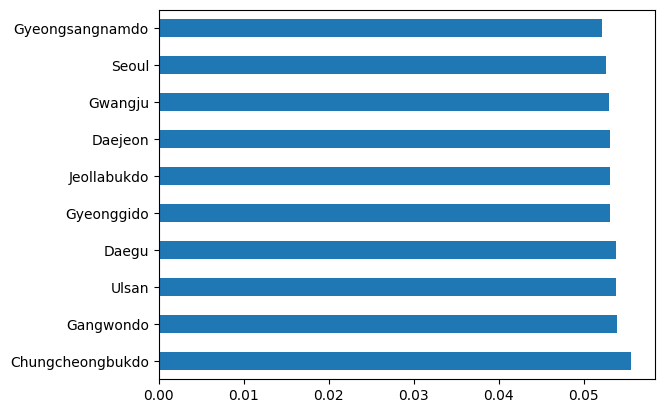

In [26]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

3. Matriks Korelasi dengan Heatmap

In [27]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns

In [30]:
# memuat data
data = pd.read_csv("Gas sales with temperature.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [29]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr()
top_corr_features = corrmat.index

Matriks Korelasi dengan Heatmap (lanjutan)


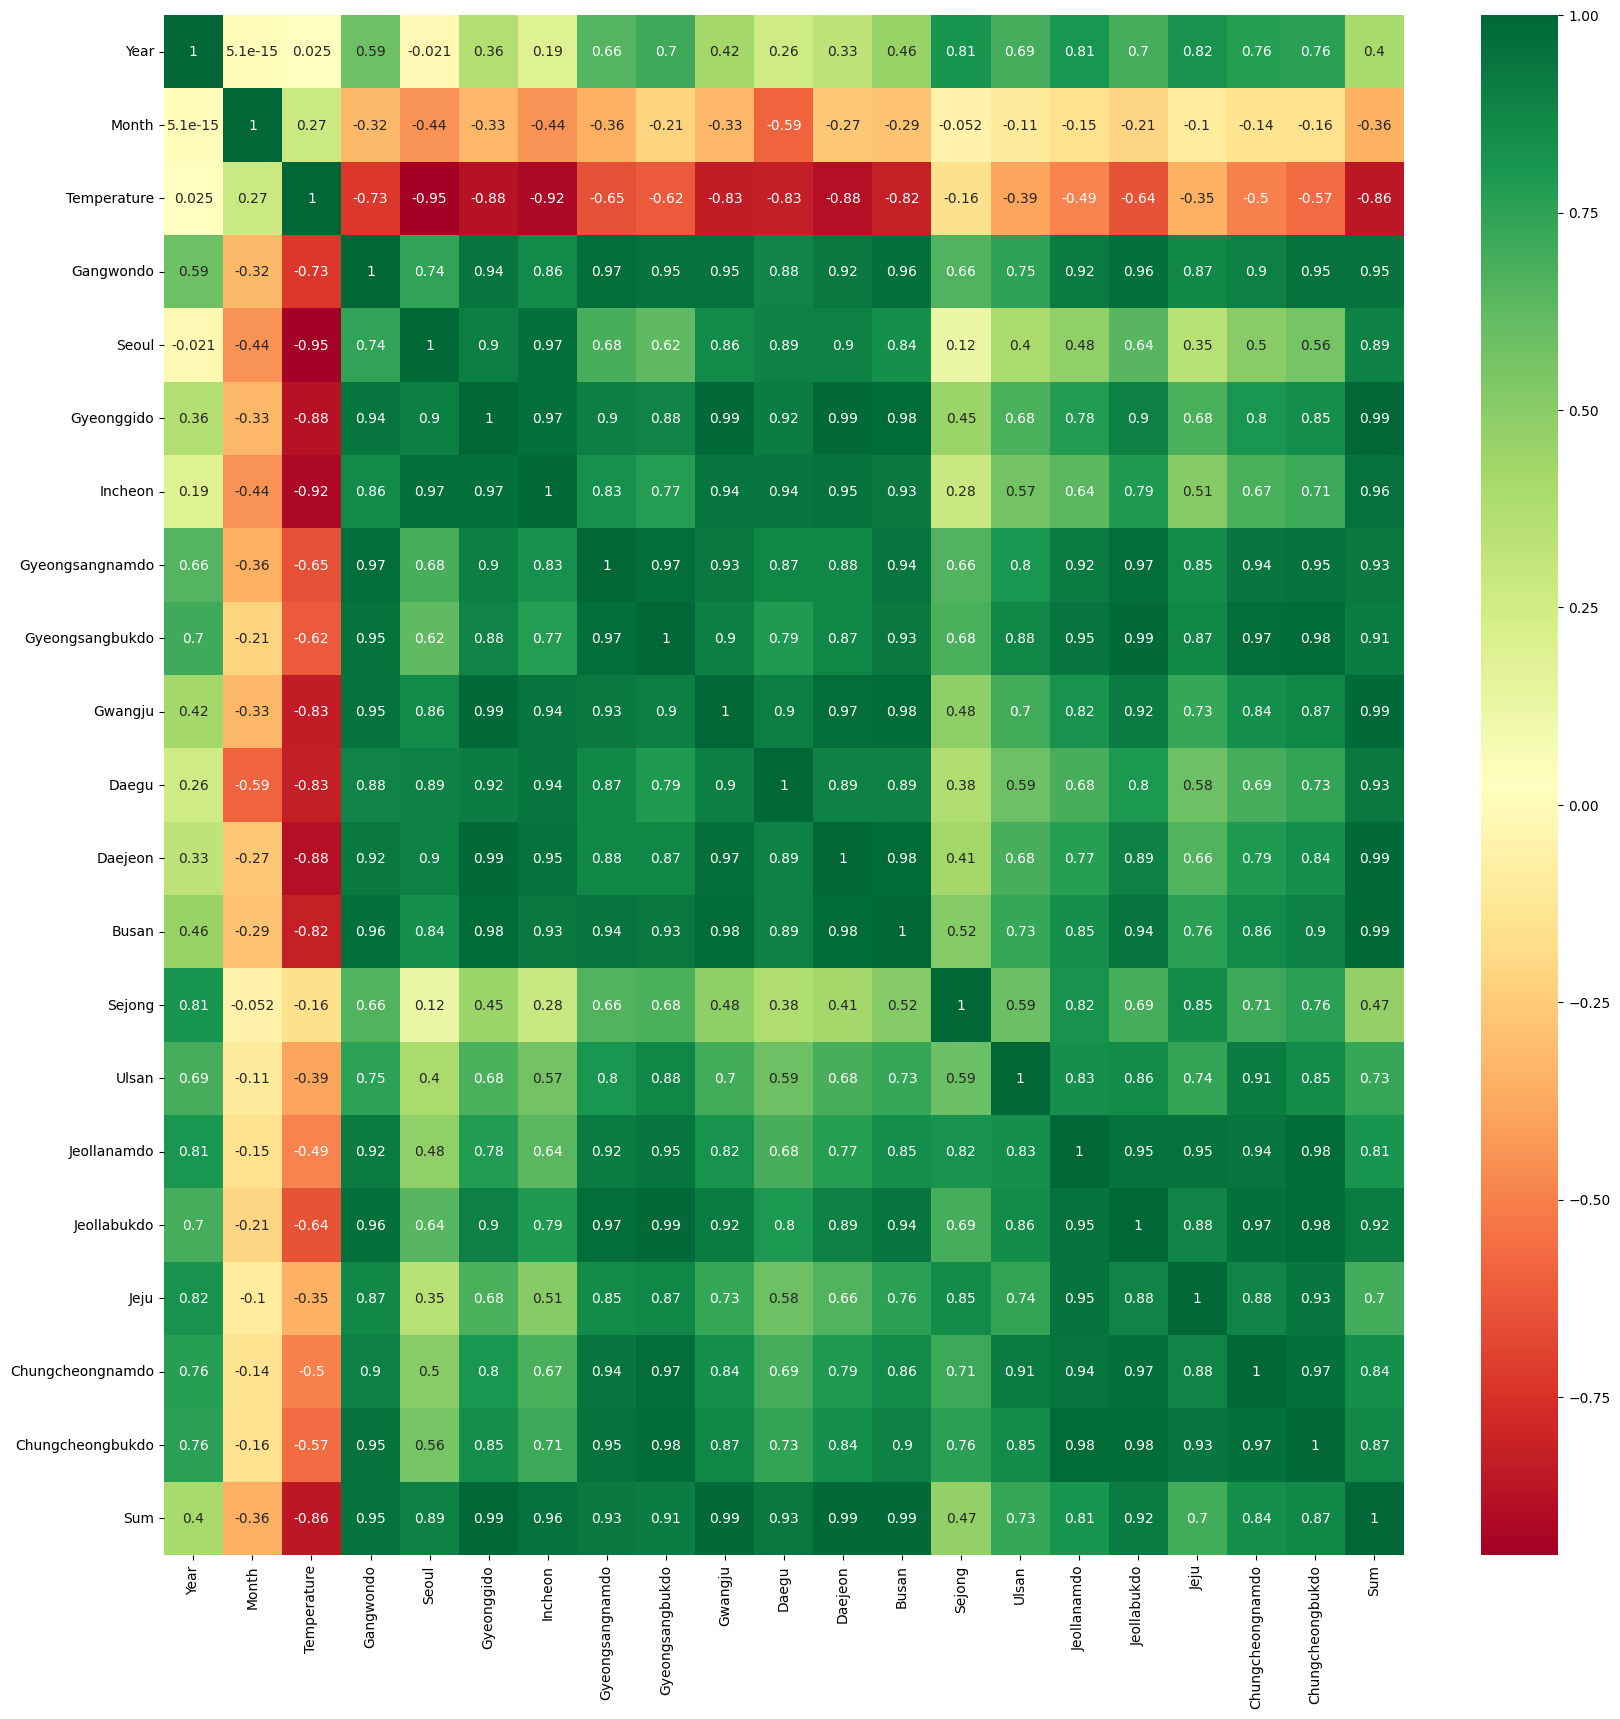

In [31]:
# plot heatmap
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

KESIMPULAN

> Hampir semua kolom mempunai relasi yang kuat satu sama lain
> Sedangkan temperatur dan bulan memiliki korelasi yang lemah denagn oang lain